# Proyecto Final de Visón Computacional

hecho por Jesús Omar Cuenca Espino

Este es un programa de apoyo para visualizar la informacion que se tiene dentro de la carpeta **data/** y entender con cuanta informacion se esta trabajando

In [1]:
import os
import warnings
from shutil import move
from dataclasses import dataclass
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

TRAIN_PATH      = "train/"
TEST_PATH       = "test/"
VALIDATION_PATH = "validation/"

## Data class

In [2]:
@dataclass(frozen=True, order=True)
class Data:
    train : int
    test : int
    validation : int

## Function to Create the Random Validation set in case of not existing already

In [3]:
def createValidationSet(fruitNames):
    assert os.path.isdir(TRAIN_PATH)
    if not os.path.isdir(VALIDATION_PATH):
        for fruit in fruitNames:
            validationFruitPath = VALIDATION_PATH+fruit+'/'
            trainingFruitPath = TRAIN_PATH+fruit+'/'
            os.makedirs(validationFruitPath)
            files = list(
                filter(
                    lambda x : os.path.isfile(f"{trainingFruitPath}{x}"), 
                    [fileName for fileName in os.listdir(trainingFruitPath)]
                )
            )
            shuffle(files)
            numFilesToMove = len(files) // 20 ## Take 5% of the training set to use as validation Set
            for _ in range(numFilesToMove):
                fileToMove = files.pop()
                move(trainingFruitPath+fileToMove,validationFruitPath+fileToMove)
            print(f"{fruit} validation set Created")

## Counting the available Data Set

Also separating the Validation Data Set in case that it doesn't exist

In [4]:
assert os.path.isdir("data")
os.chdir("data")

fruitNames = list(filter(lambda x : os.path.isdir(f"{TRAIN_PATH}{x}"), os.listdir(TRAIN_PATH)))

createValidationSet(fruitNames)

fruitMap = {}

for fruit in fruitNames:
    result = Data(
        len(list(filter(lambda x : os.path.isfile(f"{TRAIN_PATH}{fruit}/{x}"), [fileName for fileName in os.listdir(f"{TRAIN_PATH}{fruit}")]))),
        len(list(filter(lambda x : os.path.isfile(f"{TEST_PATH}{fruit}/{x}"), [fileName for fileName in os.listdir(f"{TEST_PATH}{fruit}")]))),
        len(list(filter(lambda x : os.path.isfile(f"{VALIDATION_PATH}{fruit}/{x}"), [fileName for fileName in os.listdir(f"{VALIDATION_PATH}{fruit}")]))),
    )
    fruitMap[fruit] = result

os.chdir("..")

grape validation set Created
potato validation set Created
apple validation set Created
banana validation set Created
strawberry validation set Created
watermelon validation set Created
pear validation set Created
peach validation set Created
cantaloupe validation set Created
mango validation set Created
lemon validation set Created
plum validation set Created
pepper validation set Created
cucumber validation set Created
orange validation set Created
tomato validation set Created
avocado validation set Created
eggplant validation set Created
cherry validation set Created
onion validation set Created


## Plotting the DataSet

In [5]:
def createPlot(values, labels, color, title):
    X = np.arange(len(values))
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X, values, color = color, width = .8)
    ax.set_ylabel('Quantity')
    ax.set_title(title)
    ax.set_xticks(X)
    ax.set_xticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
    plt.show()

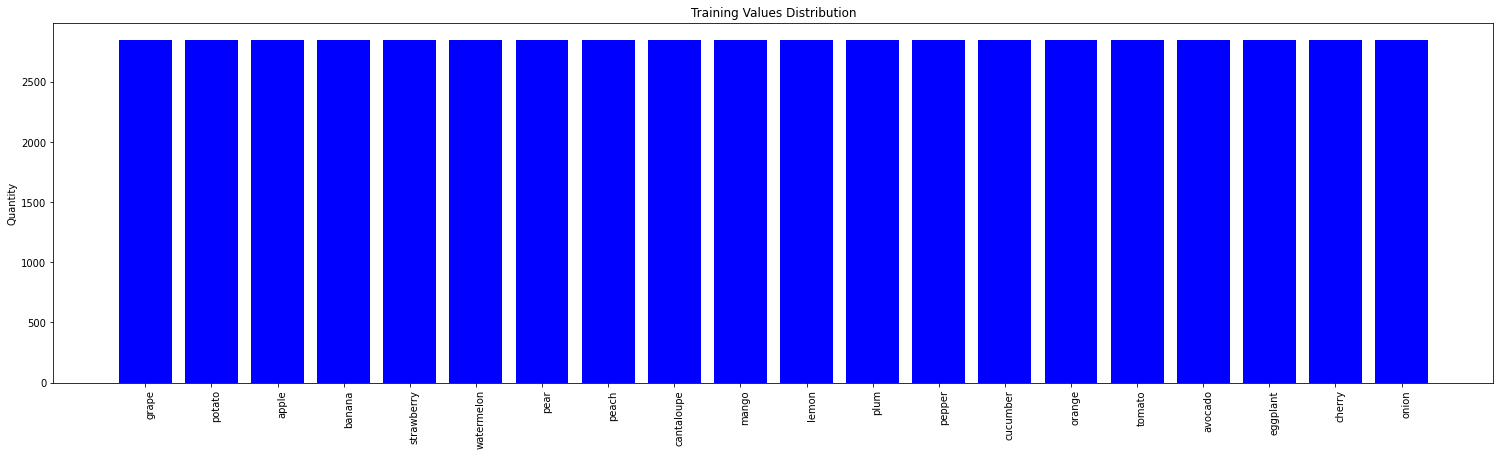

2850 values is the smallest dataset found for Training


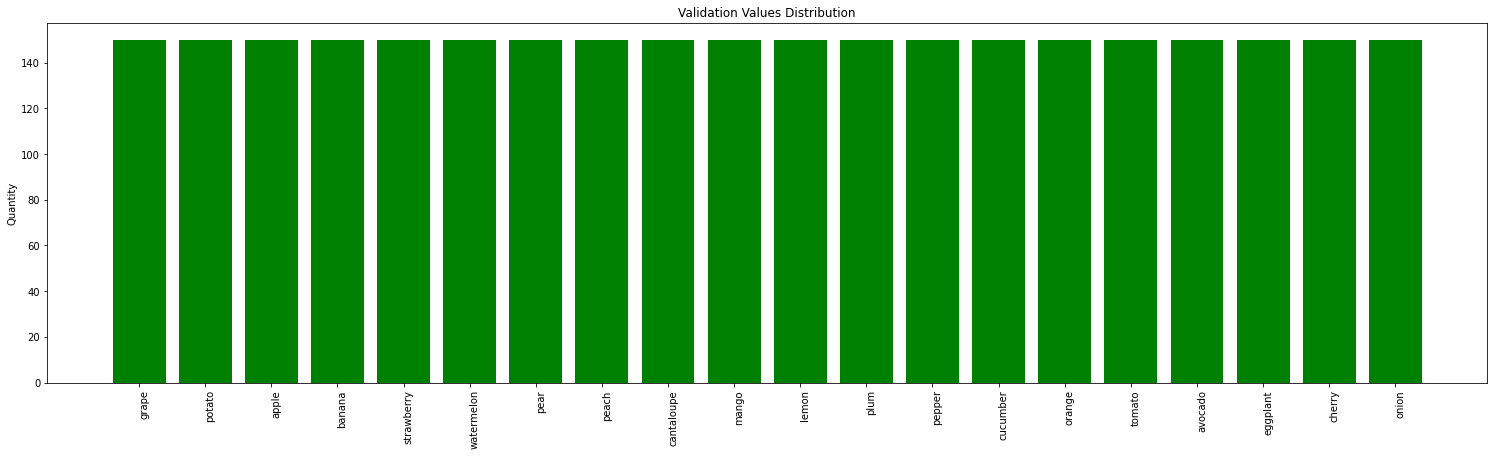

150 values is the smallest dataset found for Validation


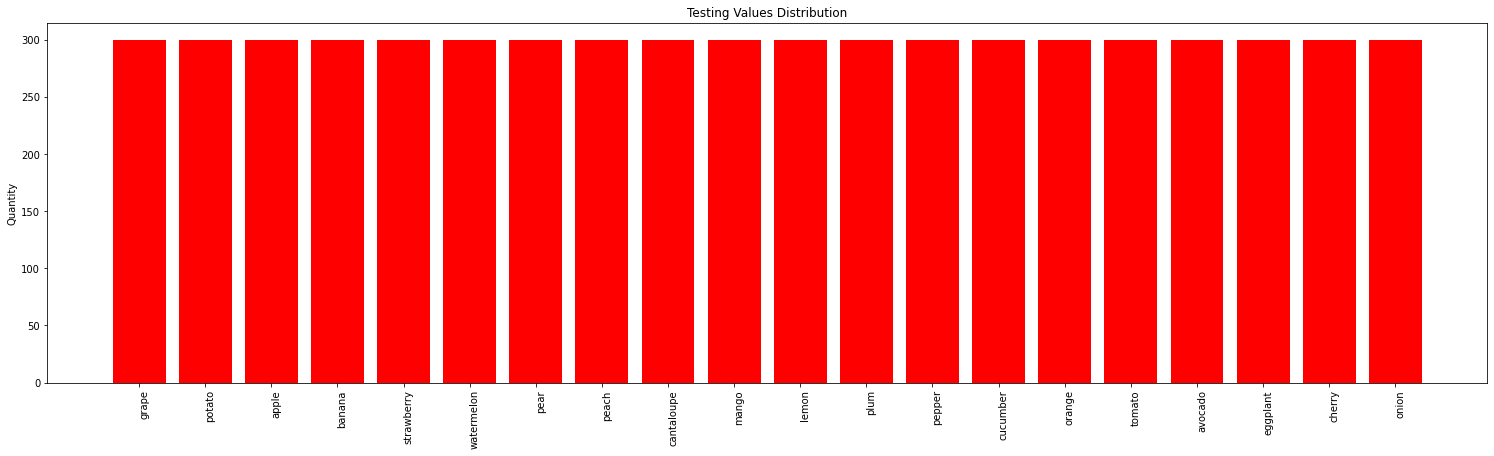

300 values is the smallest dataset found for Testing


In [6]:
types_of_fruit = fruitMap.keys()
foundValues = [fruitMap[val].train      for val in types_of_fruit]
createPlot(foundValues, types_of_fruit,"b", "Training Values Distribution")
print(f"{min(foundValues)} values is the smallest dataset found for Training")
foundValues = [fruitMap[val].validation      for val in types_of_fruit]
createPlot(foundValues, types_of_fruit,"g", "Validation Values Distribution")
print(f"{min(foundValues)} values is the smallest dataset found for Validation")
foundValues = [fruitMap[val].test      for val in types_of_fruit]
createPlot(foundValues, types_of_fruit,"r", "Testing Values Distribution")
print(f"{min(foundValues)} values is the smallest dataset found for Testing")